In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_set = pd.read_csv('train.csv')

In [ ]:
train_set.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29495,2013,73121,Oklahoma City,OK,1GNSKBE01DR127341,Chevrolet,TahoeLT
1,35969,2016,31800,Conyers,GA,1C4BJWDGXGL119960,Jeep,Wrangler
2,21477,2016,40655,Elk Grove Village,IL,2G1145S39G9149688,Chevrolet,ImpalaLTZ
3,13889,2015,41646,Marysville,WA,1G1PE5SB5F7250712,Chevrolet,Cruze2LT
4,14225,2016,33535,Toledo,OH,1N4AL3AP2GC197633,Nissan,Altima2.5


cleaning the data

first we need to drop the columns that doesnt affect much or even at all on the price

In [ ]:
train_set = train_set.drop('Vin' , axis=1)
train_set = train_set.drop('City' , axis=1)

we need to convert categorical data to numerical data , we use factorizing method since one-hot encoding takes so much memory in our case

In [ ]:
f = ["State" ,"Make" , "Model"]
for column in f:
     train_set[column] = pd.factorize(train_set[column])[0]
train_set

,Price,Year,Mileage,State,Make,Model
0,29495,2013,73121,0,0,0
1,35969,2016,31800,1,1,1
2,21477,2016,40655,2,0,2
3,13889,2015,41646,3,0,3
4,14225,2016,33535,4,2,4
...,...,...,...,...,...,...
99995,12988,2007,26126,38,25,1075
99996,22700,2017,11011,15,5,39
99997,6988,1998,112086,6,13,86
99998,23777,2012,97638,18,4,52


we set x and y

In [ ]:
x = train_set.drop('Price' , axis = 1)
y = train_set.iloc[: , 0]

standardize x and y

In [ ]:
y = np.array((y-y.mean())/y.std())
x = x.apply(lambda c:(c-c.mean())/c.std())

we define random numbers for theta and b

In [ ]:
import random
def initialize(dim):
  b = random.random()
  theta = np.random.rand(dim)
  return b, theta
b, theta = initialize(5)
print(b , theta)

0.6857887649959785 [0.28118271 0.09287852 0.98459603 0.56029909 0.42374575]


below function gives us predicted y value based on b , x and theta , we call predicted y , yhat

In [ ]:
def predy(b,theta,x):
  return b + np.dot(x , theta)
yhat=predy(b , theta , x)
yhat[0:10]

array([-1.60599264, -1.29557975, -1.25045144, -1.24036189, -0.95582701,
       -0.98289226, -0.79183766, -1.41185435, -1.11654274, -1.05122665])

we need a cost function in order to see how the model works , and if possible ,minimize it

In [ ]:
import math
def getcost(y , yhat):
  yresd=y-yhat
  return np.sum(np.dot(yresd.T , yresd))/len(y-yresd)
yhat=predy(b , theta , x)
getcost(y , yhat)

2.7505356264127254

we need to update random b and thetas based on gradient descent formulas

In [ ]:
def updatetheta(x , y , yhat , b0 , theta0 , l):
  db = (np.sum(yhat-y)*2)/len(y)
  dw = (np.dot((yhat-y) , x)*2)/len(y)
  b1=b0-l*db
  theta1=theta0-l*dw
  return b1 , theta1
print("first " , b , theta)
yhat=predy(b , theta , x)
b , theta = updatetheta(x , y , yhat , b , theta , 0.01)
print("after" , b , theta)
getcost(y , yhat)

first  0.6857887649959785 [0.28118271 0.09287852 0.98459603 0.56029909 0.42374575]
after 0.672072989696059 [0.28669395 0.08679159 0.96516209 0.54916283 0.4143767 ]


2.7505356264127254

at last we need a function to run gradient descent several times in order to get the best results

In [ ]:
def gradientDescent(x , y , alpha , itiration):
  b , theta=initialize(x.shape[1])
  i=0
  gd_i=pd.DataFrame(columns=['iter' , 'cost'])
  res=0
  for j in range(itiration):
    yhat=predy(b , theta , x)
    cost=getcost(y , yhat)
    prevb=b
    prevt=theta
    b , theta=updatetheta(x , y , yhat, prevb , prevt , alpha)
    if(i%10==0):
      gd_i.loc[res]=[i , cost]
    res=res+1
    i = i+1
  print("final" , b , theta)
  return gd_i , b , theta
gd_i , b , theta=gradientDescent(x , y , alpha=0.001 , itiration=100)

final 0.3501783216709825 [0.71873018 0.10266036 0.33142282 0.49981434 0.29713215]


this shows that our cost value decreases every 10 iteration , so it looks like the model works fine

In [ ]:
gd_i[0:10]

,iter,cost
0,0.0,1.628928
10,10.0,1.596096
20,20.0,1.564676
30,30.0,1.534607
40,40.0,1.505829
50,50.0,1.478283
60,60.0,1.451915
70,70.0,1.426673
80,80.0,1.402507
90,90.0,1.379369


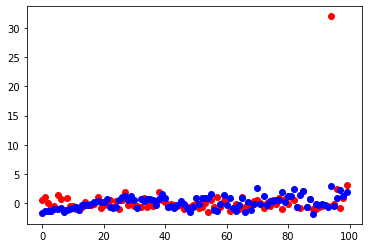

In [ ]:
#plot for trained data
plt.scatter(range(100) , y[:100] , color='r')
plt.scatter(range(100) , yhat[:100] , color='b')
plt.show()

we are gonna use our final b and theta to use it on test data set

In [ ]:

test_set = pd.read_csv('test.csv')

In [ ]:
test_set = test_set.drop('Vin' , axis=1)
test_set = test_set.drop('City' , axis=1)
test_set = test_set.drop('CarId' , axis=1)

we do the same cleaning to our test data

In [ ]:
f = ["State" ,"Make" , "Model"]
for column in f:
     test_set[column] = pd.factorize(test_set[column])[0]
test_set

,Year,Mileage,State,Make,Model
0,2013,72740,0,0,0
1,2017,5355,1,0,1
2,2016,41454,2,1,2
3,2017,19870,3,2,3
4,2016,22576,4,2,4
...,...,...,...,...,...
49995,2013,76577,4,0,302
49996,2011,84882,33,8,498
49997,2014,27424,0,1,226
49998,2017,1912,10,1,455


In [ ]:
x_test = test_set

In [ ]:
finalY = b + np.dot(x_test , theta)

In [ ]:
final=pd.DataFrame(columns=['CarId' , 'Price'])
final['Price'] = finalY
t = pd.read_csv('test.csv')
final['CarId']=t['CarId']

In [ ]:
final

,CarId,Price
0,0,8914.668501
1,1,2000.403718
2,2,5706.749639
3,3,3492.775560
4,4,3770.484315
...,...,...
49995,49995,9399.635897
49996,49996,10322.640392
49997,49997,4330.882104
49998,49998,1785.324719


In [ ]:
import csv
final.to_csv('LR.csv' , index=False)